In [1]:
# Importing necessary libraries and suppressing warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # using Agg backend as per instructions
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

# Setting plot style for consistency
sns.set(style="whitegrid")

In [2]:
df=pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\Bookings.csv")
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,Unnamed: 20
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,...,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,#NAME?,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,NaN,No,NaN,158,Cash,13,4.1,4.0,#NAME?,NaN
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,NaN,No,NaN,386,UPI,40,4.2,4.8,#NAME?,NaN
3,2024-07-22 3:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,...,NaN,NaN,NaN,384,NaN,0,NaN,NaN,#NAME?,NaN
4,2024-07-02 9:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,NaN,No,NaN,822,Credit Card,45,4.0,3.0,#NAME?,NaN


In [3]:
# Drop irrelevant columns
df.drop(columns=['Vehicle Images', 'Unnamed: 20'], inplace=True)

In [4]:
# Convert Date & Time
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [5]:
df.shape

(103024, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

In [7]:
df.describe()

,Date,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957


In [8]:
df.duplicated().sum()

0

## Column Type:
### Numerical:
Booking_Value,V_TAT,C_TAT,Ride_Distance,Driver_Ratings,Customer_Rating
### Categorical:
Booking_Status,Vehicle_Type,Payment_Method,Pickup_Location,Drop_Location, Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason

### Numerical Distribution

In [9]:
df['Booking_Value'].describe()

count    103024.000000
mean        548.751883
std         536.541221
min         100.000000
25%         242.000000
50%         386.000000
75%         621.000000
max        2999.000000
Name: Booking_Value, dtype: float64

<Axes: ylabel='Frequency'>

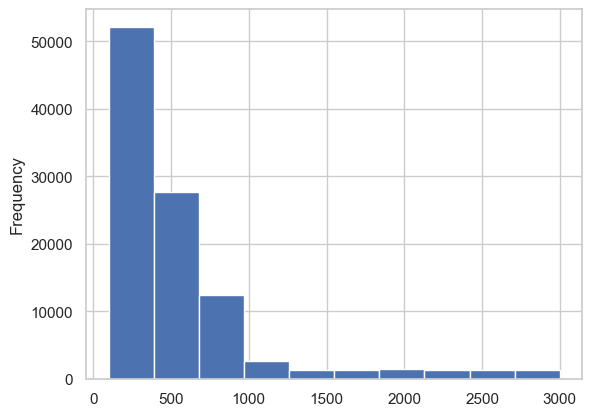

In [40]:
df['Booking_Value'].plot(kind='hist',bins=10)

### Distribution Shape
* The histogram shows a high concentration of bookings in the lower value range.
* The KDE plot reveals a long right tail, indicating that fewer bookings have very high values.
* This confirms that most rides are low to mid-priced, with relatively fewer expensive bookings.

<Axes: ylabel='Density'>

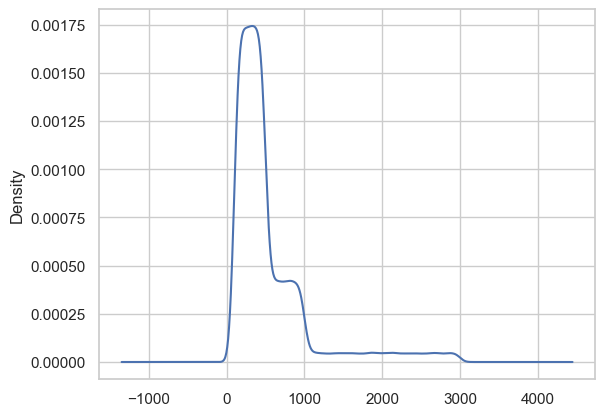

In [42]:
df['Booking_Value'].plot(kind='kde')

* This value indicates a strong positive (right) skew:

* Majority of booking values are clustered at lower levels.

* A small number of high-value bookings significantly extend the tail.

In [43]:
df['Booking_Value'].skew()   

2.571710933824837

<Axes: >

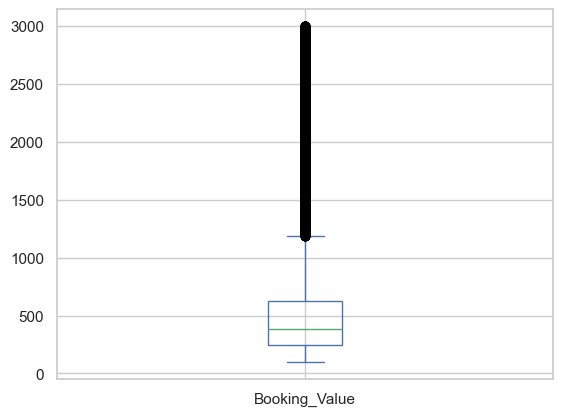

In [44]:
df['Booking_Value'].plot(kind='box')

* Long-distance trips

* Premium vehicle types

* Sudden increase pricing or peak-hour demand

In [45]:
df[df['Booking_Value'] >1200]

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,is_canceled,Hour
19,2024-07-12 14:44:00,14:44:00,CNR1591113431,Success,CID902781,eBike,Koramangala,Sarjapur Road,245.0,70.0,...,NaN,No,NaN,2014,Cash,33,4.2,4.9,False,14
28,2024-07-30 19:44:00,19:44:00,CNR6805579107,Success,CID810214,Prime SUV,Indiranagar,Indiranagar,35.0,145.0,...,NaN,No,NaN,2183,Cash,20,4.0,4.4,False,19
49,2024-07-26 13:20:00,13:20:00,CNR9312632867,Success,CID649563,Prime SUV,Tumkur Road,Mysore Road,217.0,120.0,...,NaN,Yes,Vehicle Breakdown,2936,Cash,34,4.1,4.6,False,13
64,2024-07-04 15:32:00,15:32:00,CNR2735636504,Driver Not Found,CID111173,Prime SUV,Cox Town,Chamarajpet,NaN,NaN,...,NaN,NaN,NaN,1310,NaN,0,NaN,NaN,True,15
78,2024-07-29 14:56:00,14:56:00,CNR4314026109,Success,CID259573,Prime SUV,Tumkur Road,Bannerghatta Road,266.0,115.0,...,NaN,No,NaN,2208,Cash,40,4.0,4.5,False,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102975,2024-07-31 13:26:00,13:26:00,CNR8322128353,Success,CID490776,Prime SUV,BTM Layout,Vijayanagar,105.0,85.0,...,NaN,No,NaN,1877,Cash,43,3.3,4.5,False,13
102995,2024-07-31 15:55:00,15:55:00,CNR9940959929,Success,CID799236,eBike,Kammanahalli,Sahakar Nagar,231.0,65.0,...,NaN,No,NaN,2613,UPI,19,4.9,4.4,False,15
103011,2024-07-31 07:01:00,07:01:00,CNR5427755403,Success,CID406104,Auto,BTM Layout,Cox Town,175.0,135.0,...,NaN,Yes,Other Issue,1478,UPI,1,3.8,4.2,False,7
103016,2024-07-31 09:20:00,09:20:00,CNR3395373353,Driver Not Found,CID355268,Prime Sedan,Malleshwaram,Tumkur Road,NaN,NaN,...,NaN,NaN,NaN,1671,NaN,0,NaN,NaN,True,9


In [46]:
df['V_TAT'].describe()              # Vehicle Turnaround Time: The time taken (in seconds) for a driver to accept the request.

count    63967.000000
mean       170.876952
std         80.803640
min         35.000000
25%         98.000000
50%        168.000000
75%        238.000000
max        308.000000
Name: V_TAT, dtype: float64

<Axes: ylabel='Density'>

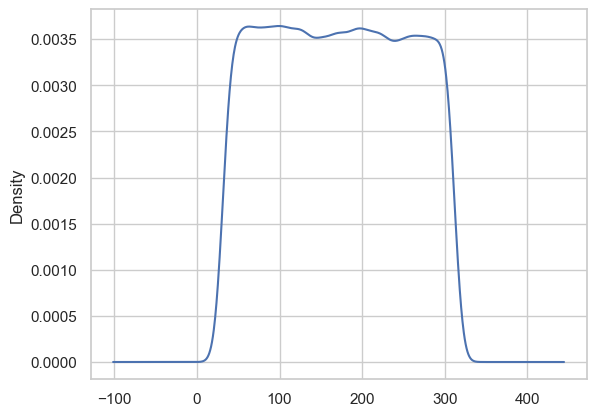

In [47]:
df['V_TAT'].plot(kind='kde')

In [48]:
df['V_TAT'].skew()

0.013318787944941592

<Axes: >

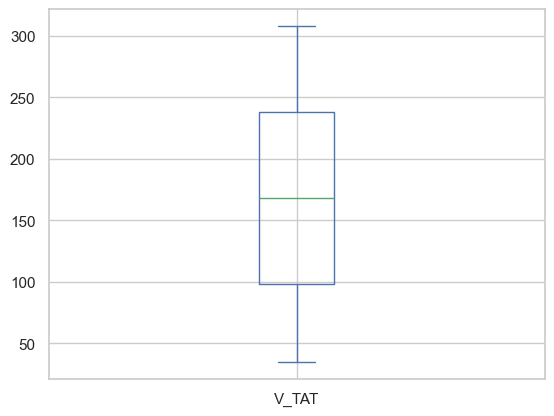

In [49]:
df['V_TAT'].plot(kind='box')

### Conclusion
* V_TAT is normally distributed with minimal skewness, indicating operational stability.
* Most drivers respond to ride requests within 1.5–3 minutes, which reflects good platform efficiency.
* The absence of extreme outliers suggests no abnormal driver behavior or system issues.
* This feature is well-suited for predictive modeling without requiring transformation.

In [50]:
df['C_TAT'].describe()       #Customer Turnaround Time: The time taken (in seconds) for the customer to board after arrival.

count    63967.000000
mean        84.873372
std         36.005100
min         25.000000
25%         55.000000
50%         85.000000
75%        115.000000
max        145.000000
Name: C_TAT, dtype: float64

<Axes: ylabel='Density'>

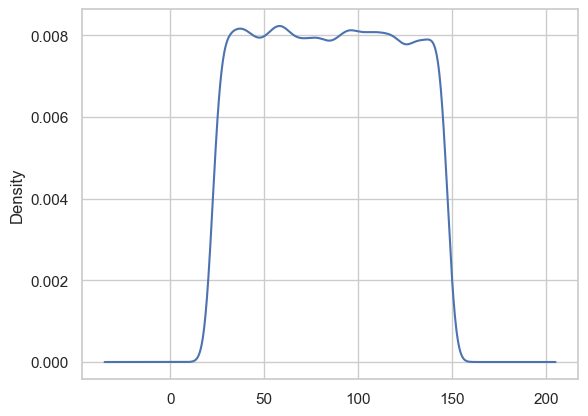

In [51]:
df['C_TAT'].plot(kind='kde')

In [52]:
df['C_TAT'].skew()

0.007211885886118321

<Axes: >

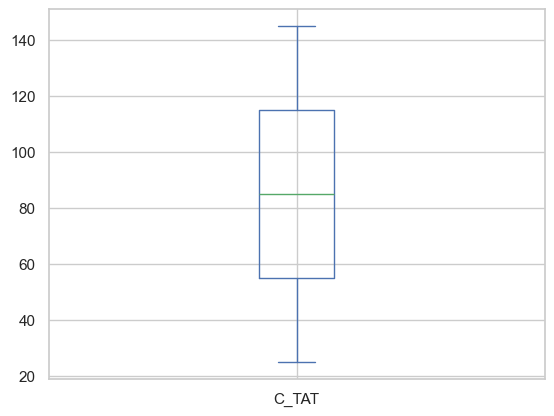

In [53]:
df['C_TAT'].plot(kind='box')

# Conclusion
* C_TAT is normally distributed with very low variance, indicating strong customer compliance and efficient pickup processes.
* Most customers board within 1–2 minutes after vehicle arrival.
* The lack of extreme outliers suggests minimal friction at pickup points.
* This feature is stable and reliable for modeling and performance monitoring.

In [54]:
df['Ride_Distance'].describe()

count    103024.000000
mean         14.189927
std          15.776270
min           0.000000
25%           0.000000
50%           8.000000
75%          26.000000
max          49.000000
Name: Ride_Distance, dtype: float64

<Axes: ylabel='Density'>

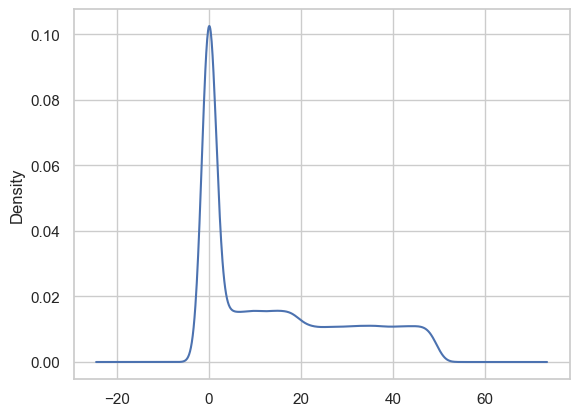

In [55]:
df['Ride_Distance'].plot(kind='kde')

In [56]:
df['Ride_Distance'].skew()

0.7605992209835784

<Axes: >

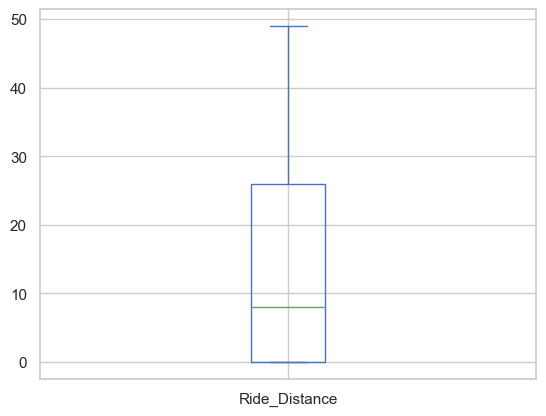

In [57]:
df['Ride_Distance'].plot(kind='box')

# Conclusion
* Ride_Distance is moderately right-skewed, driven by a mix of very short and long rides.
* Zero-distance values are meaningful and should be retained, as they capture cancellation behavior.
* Long-distance rides contribute significantly to revenue but occur less frequently.
* For modeling, consider:
Separating completed vs canceled rides.
Applying log transformation for successful rides only.

In [58]:
df['Driver_Ratings'].describe()

count    63967.000000
mean         3.997457
std          0.576834
min          3.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: Driver_Ratings, dtype: float64

<Axes: ylabel='Density'>

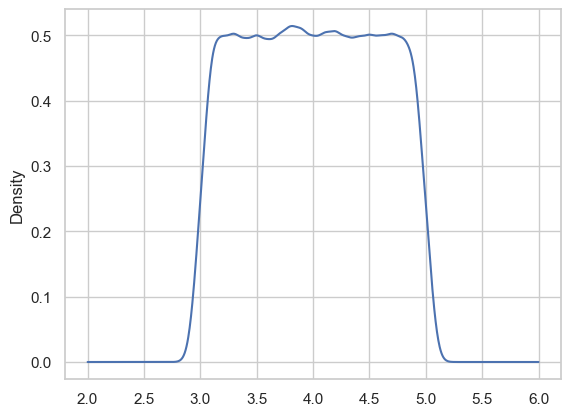

In [59]:
df['Driver_Ratings'].plot(kind='kde')

In [60]:
df['Driver_Ratings'].skew()

0.0019425822254559905

<Axes: >

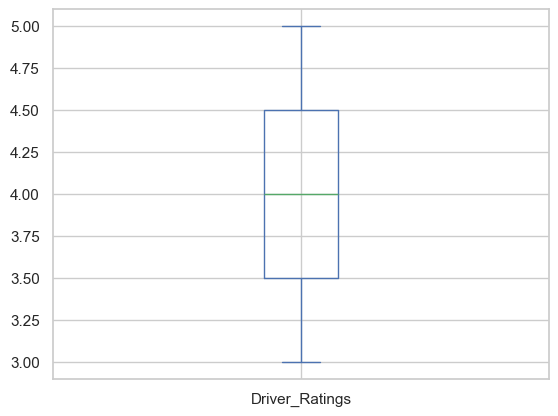

In [61]:
df['Driver_Ratings'].plot(kind='box')

In [62]:
df['Customer_Rating'].describe()

count    63967.000000
mean         3.998313
std          0.578957
min          3.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: Customer_Rating, dtype: float64

<Axes: ylabel='Density'>

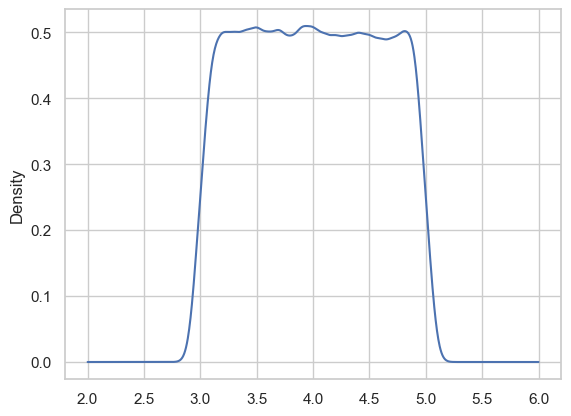

In [63]:
df['Customer_Rating'].plot(kind='kde')

In [64]:
df['Customer_Rating'].skew()

0.006677467739134866

<Axes: >

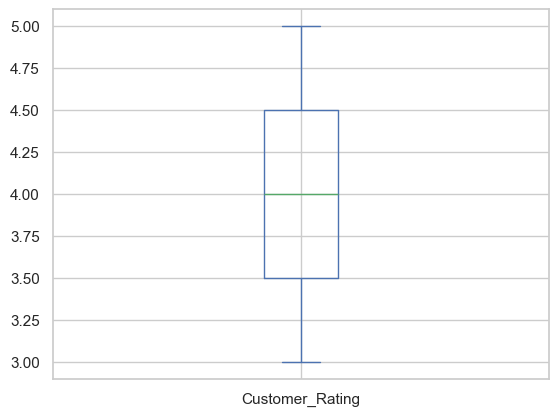

In [65]:
df['Customer_Rating'].plot(kind='box')

### Categorical Distribution

In [66]:
df['Booking_Status'].value_counts(normalize=True) * 100

Booking_Status
Success                 62.089416
Canceled by Driver      17.892918
Canceled by Customer    10.190829
Driver Not Found         9.826836
Name: proportion, dtype: float64

* The mean is significantly higher than the median, suggesting that higher booking values are pulling the average upward.

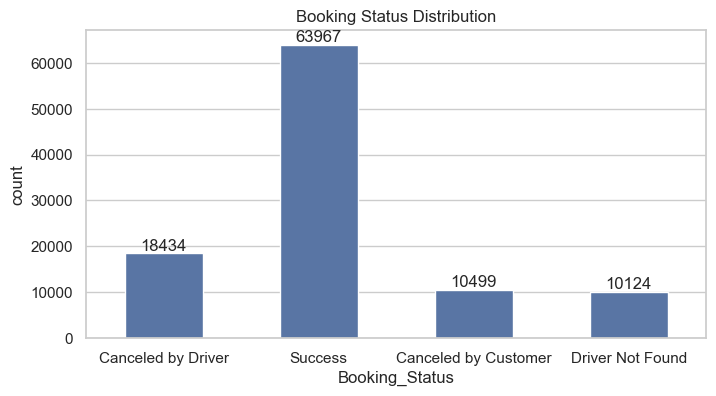

In [11]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='Booking_Status', data=df, width=0.5)
ax.bar_label(ax.containers[0])
plt.title("Booking Status Distribution")
plt.show()

In [12]:
df['Canceled_Rides_by_Driver'].value_counts(normalize=True) * 100

Canceled_Rides_by_Driver
Personal & Car related issue           35.488771
Customer related issue                 29.364218
Customer was coughing/sick             19.822068
More than permitted people in there    15.324943
Name: proportion, dtype: float64

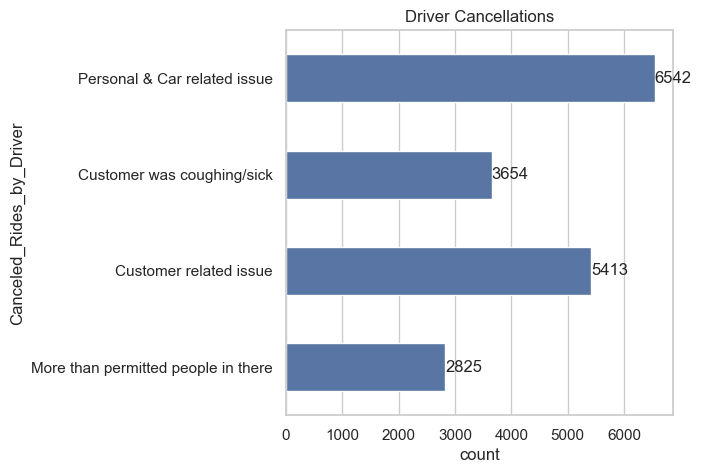

In [13]:
plt.figure(figsize=(5,5))
ax=sns.countplot(y='Canceled_Rides_by_Driver', data=df,width=0.5)
ax.bar_label(ax.containers[0])
plt.title("Driver Cancellations")
plt.show()

In [14]:
#Customer Cancellations
df['Canceled_Rides_by_Customer'].value_counts(normalize=True) * 100

Canceled_Rides_by_Customer
Driver is not moving towards pickup location    30.240975
Driver asked to cancel                          25.430993
Change of plans                                 19.820935
AC is Not working                               14.934756
Wrong Address                                    9.572340
Name: proportion, dtype: float64

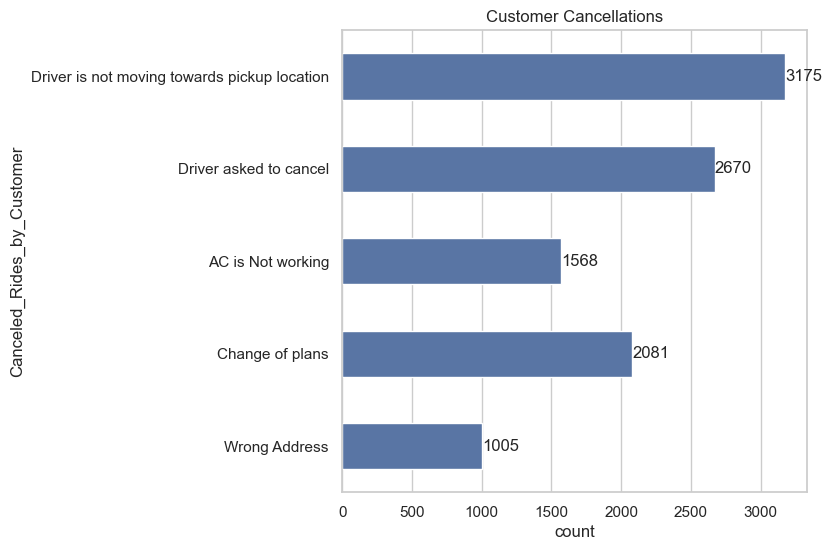

In [15]:
plt.figure(figsize=(6,6))
ax=sns.countplot(y='Canceled_Rides_by_Customer', data=df, width=0.5)
ax.bar_label(ax.containers[0])
plt.title("Customer Cancellations")
plt.show()

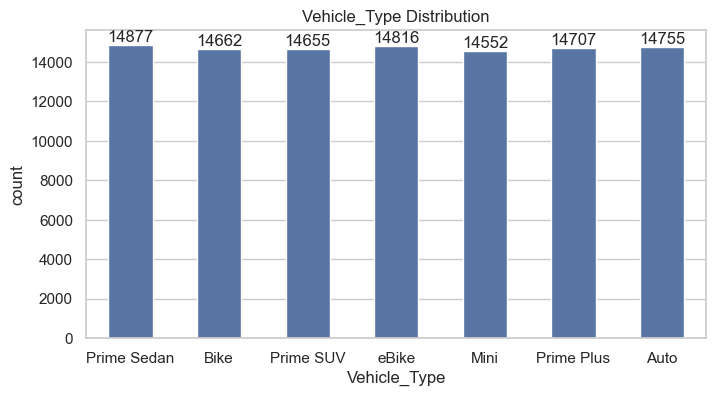

In [16]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='Vehicle_Type', data=df, width=0.5)
ax.bar_label(ax.containers[0])
plt.title("Vehicle_Type Distribution")
plt.show()

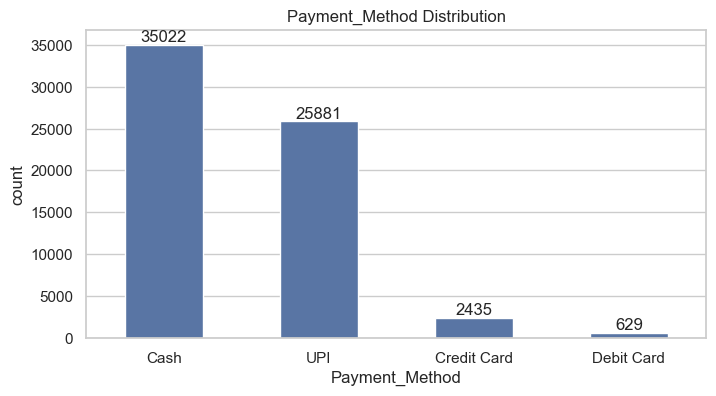

In [17]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='Payment_Method', data=df, width=0.5)
ax.bar_label(ax.containers[0])
plt.title("Payment_Method Distribution")
plt.show()

<Axes: ylabel='count'>

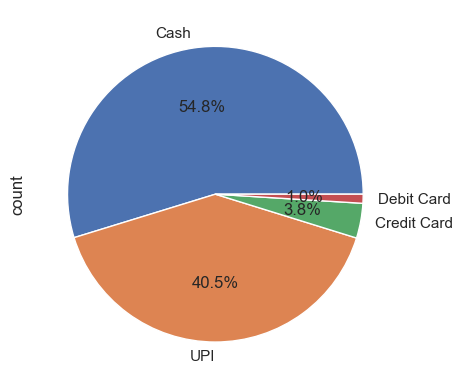

In [18]:
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [19]:
df['Incomplete_Rides'].value_counts()

Incomplete_Rides
No     60041
Yes     3926
Name: count, dtype: int64

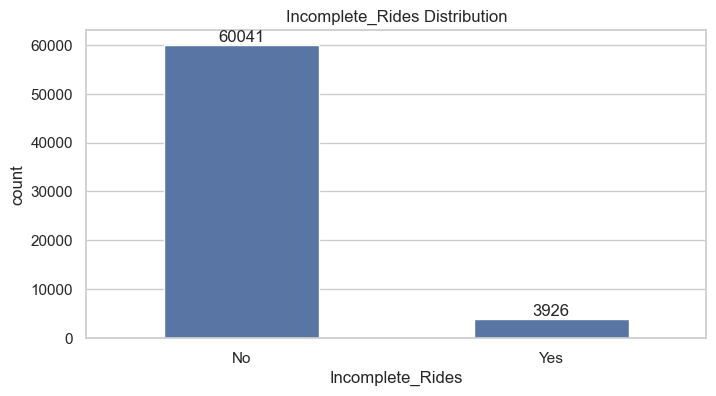

In [20]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='Incomplete_Rides', data=df, width=0.5)
ax.bar_label(ax.containers[0])
plt.title("Incomplete_Rides Distribution")
plt.show()

<Axes: ylabel='count'>

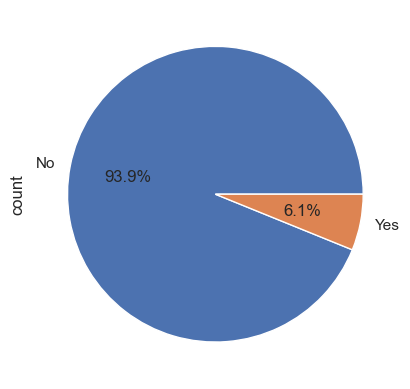

In [21]:
df['Incomplete_Rides'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [22]:
#df['Incomplete_Rides_Reason'] = df['Incomplete_Rides_Reason'].fillna('Complete')

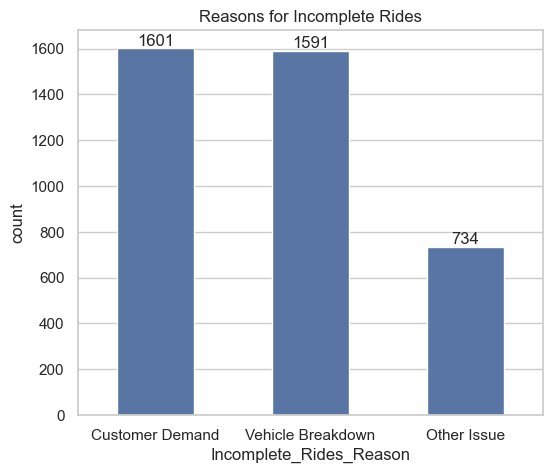

In [23]:
plt.figure(figsize=(6,5))
ax=sns.countplot(
    x='Incomplete_Rides_Reason',
    data=df, width=0.5,
    order=df['Incomplete_Rides_Reason'].value_counts().index
)
ax.bar_label(ax.containers[0])
plt.title("Reasons for Incomplete Rides")
plt.show()

<Axes: ylabel='count'>

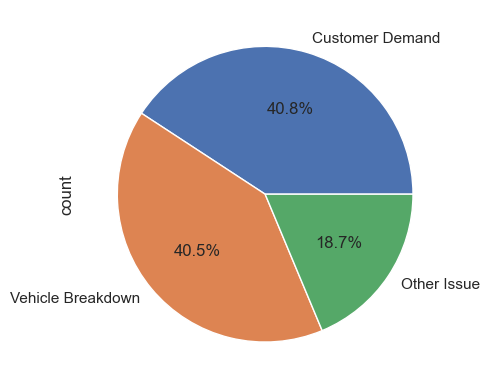

In [24]:
df['Incomplete_Rides_Reason'].value_counts().plot(kind='pie', autopct='%1.1f%%')

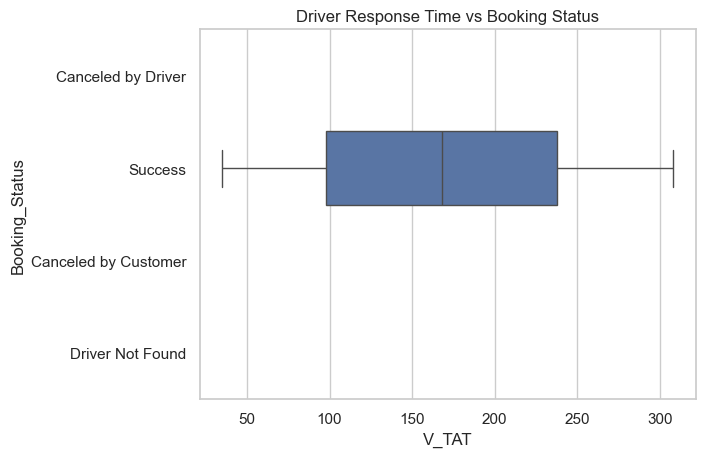

In [25]:
df.groupby('Booking_Status')['V_TAT'].median().sort_values()
sns.boxplot(
    data=df,
    y='Booking_Status',
    x='V_TAT'
)
plt.title("Driver Response Time vs Booking Status")
plt.show()


In [26]:
df['is_canceled'] = df['Booking_Status'] != 'Success'

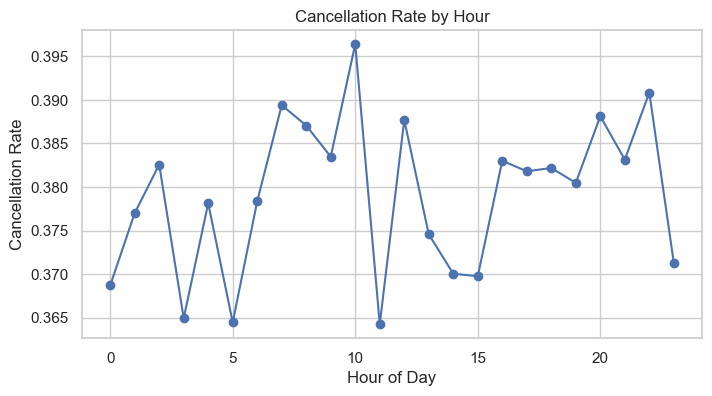

In [27]:
df['Hour'] = df['Time'].astype(str).str[:2].astype(int)

hourly_cancel = df.groupby('Hour')['is_canceled'].mean()

plt.figure(figsize=(8,4))
hourly_cancel.plot(marker='o')
plt.title("Cancellation Rate by Hour")
plt.ylabel("Cancellation Rate")
plt.xlabel("Hour of Day")
plt.grid(True)
plt.show()

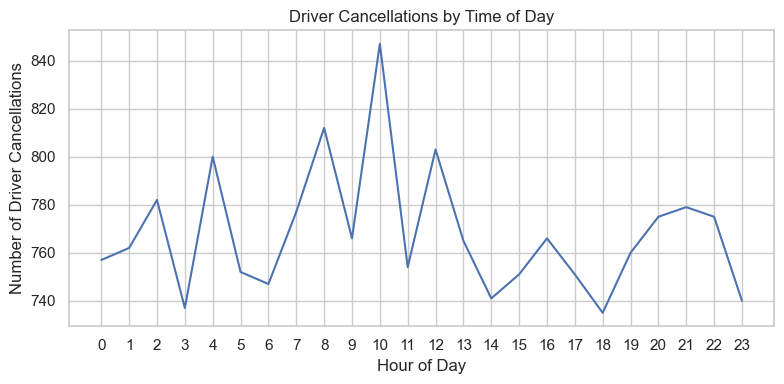

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter driver-canceled rides
driver_cancel = df[df['Booking_Status'] == 'Canceled by Driver']

# Count cancellations by hour
hourly_cancel = driver_cancel['Hour'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.lineplot(x=hourly_cancel.index, y=hourly_cancel.values)

plt.title('Driver Cancellations by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Driver Cancellations')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


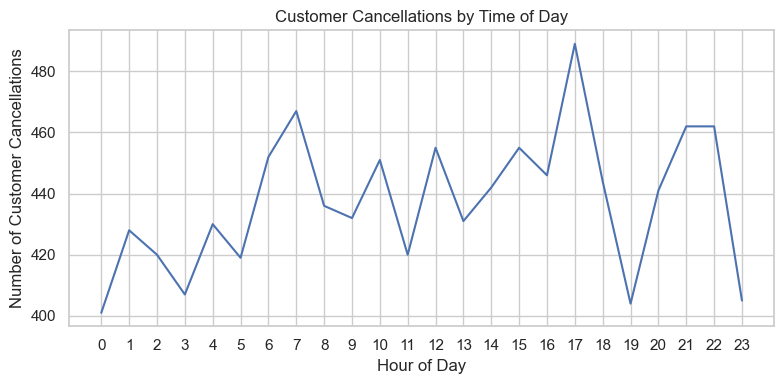

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter customer-canceled rides
customer_cancel = df[df['Booking_Status'] == 'Canceled by Customer']

# Count cancellations by hour
hourly_cancel = customer_cancel['Hour'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.lineplot(x=hourly_cancel.index, y=hourly_cancel.values)

plt.title('Customer Cancellations by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Customer Cancellations')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

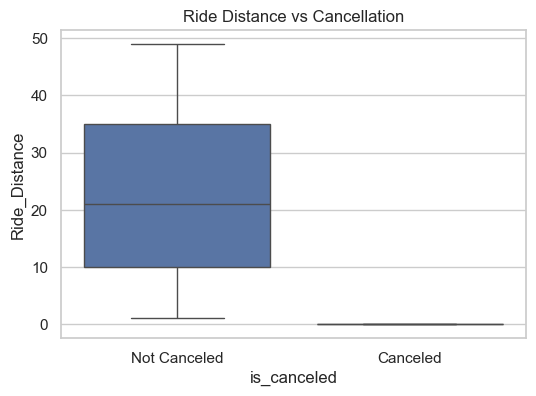

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='is_canceled', y='Ride_Distance')
plt.title("Ride Distance vs Cancellation")
plt.xticks([0,1], ['Not Canceled','Canceled'])
plt.show()


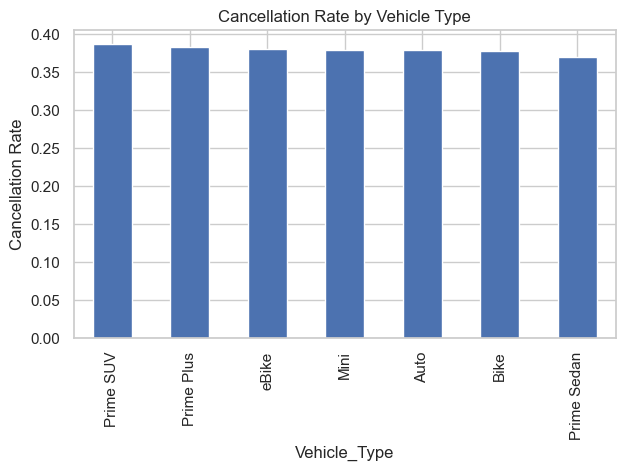

In [31]:
vehicle_cancel = df.groupby('Vehicle_Type')['is_canceled'].mean().sort_values(ascending=False)

plt.figure(figsize=(7,4))
vehicle_cancel.plot(kind='bar')
plt.title("Cancellation Rate by Vehicle Type")
plt.ylabel("Cancellation Rate")
plt.show()

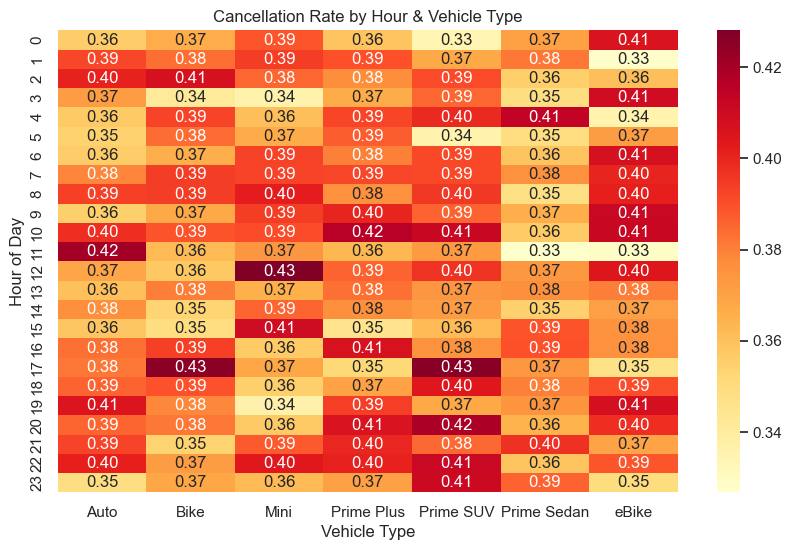

In [32]:
# Create a pivot table: Hour vs Vehicle_Type, showing cancellation rate
bivar_cancel = df.pivot_table(
    index='Hour', 
    columns='Vehicle_Type', 
    values='is_canceled', 
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(bivar_cancel, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Cancellation Rate by Hour & Vehicle Type")
plt.ylabel("Hour of Day")
plt.xlabel("Vehicle Type")
plt.show()



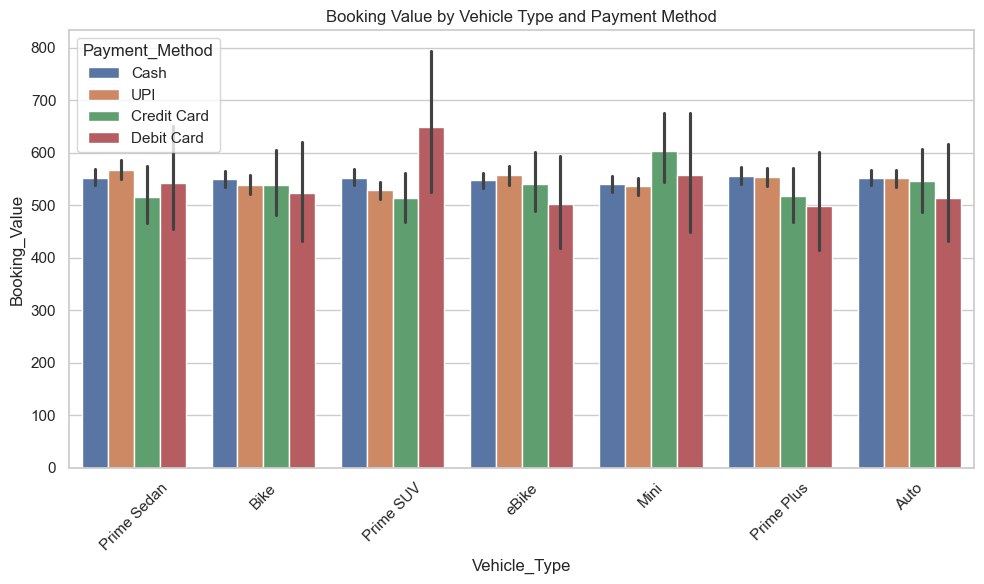

In [33]:
# Booking Value by Vehicle Type and Payment Method
# Grouped bar plot for Vehicle_Type by Payment_Method, if it makes sense
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Booking_Value', hue='Payment_Method', data=df)
plt.title('Booking Value by Vehicle Type and Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


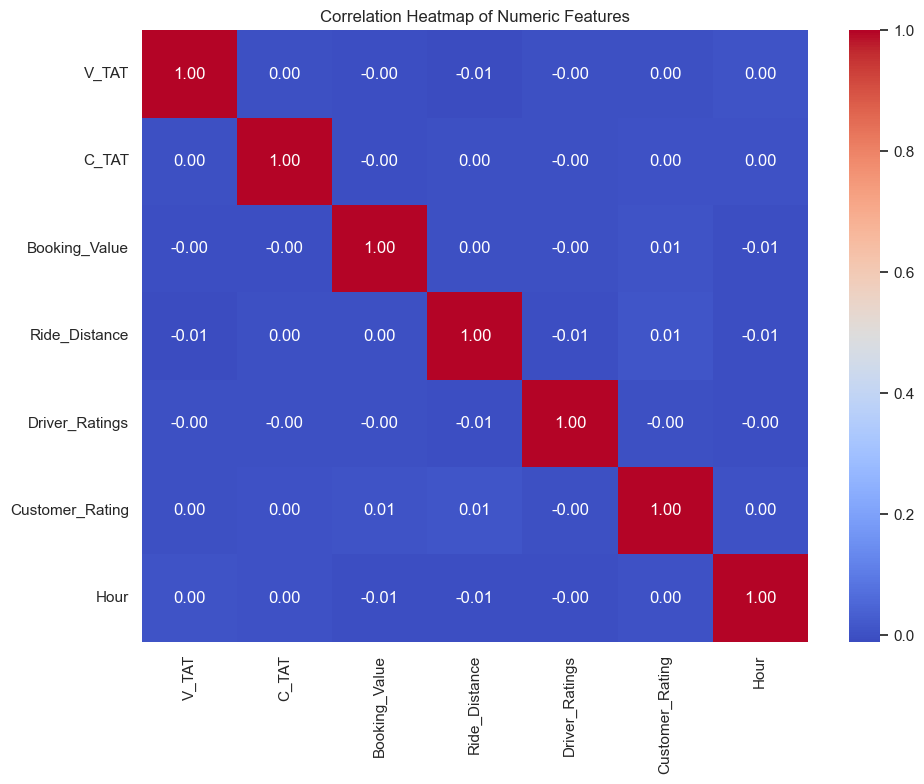

In [34]:
# Generate a correlation heatmap for numeric features if there are four or more numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()


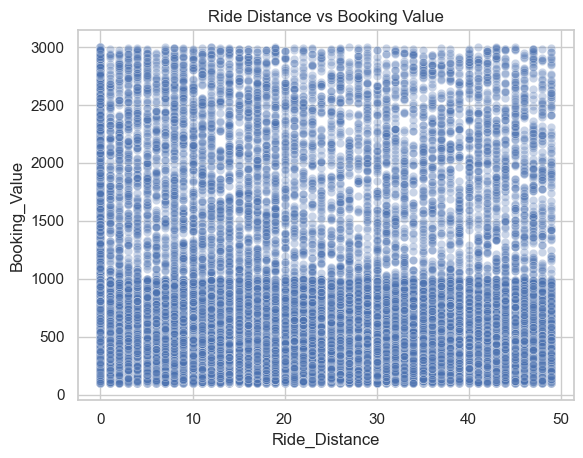

In [35]:
df[['Ride_Distance', 'Booking_Value']].corr()
sns.scatterplot(
    data=df,
    x='Ride_Distance',
    y='Booking_Value',
    alpha=0.3
)
plt.title("Ride Distance vs Booking Value")
plt.show()


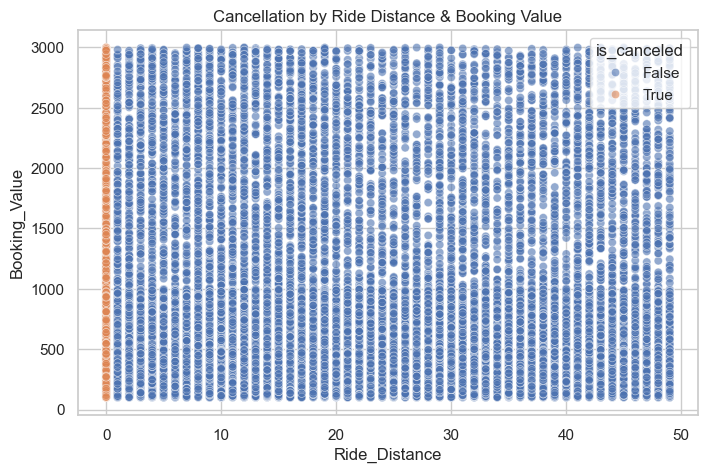

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df, 
    x='Ride_Distance', 
    y='Booking_Value', 
    hue='is_canceled',
    alpha=0.6
)
plt.title("Cancellation by Ride Distance & Booking Value")
plt.show()


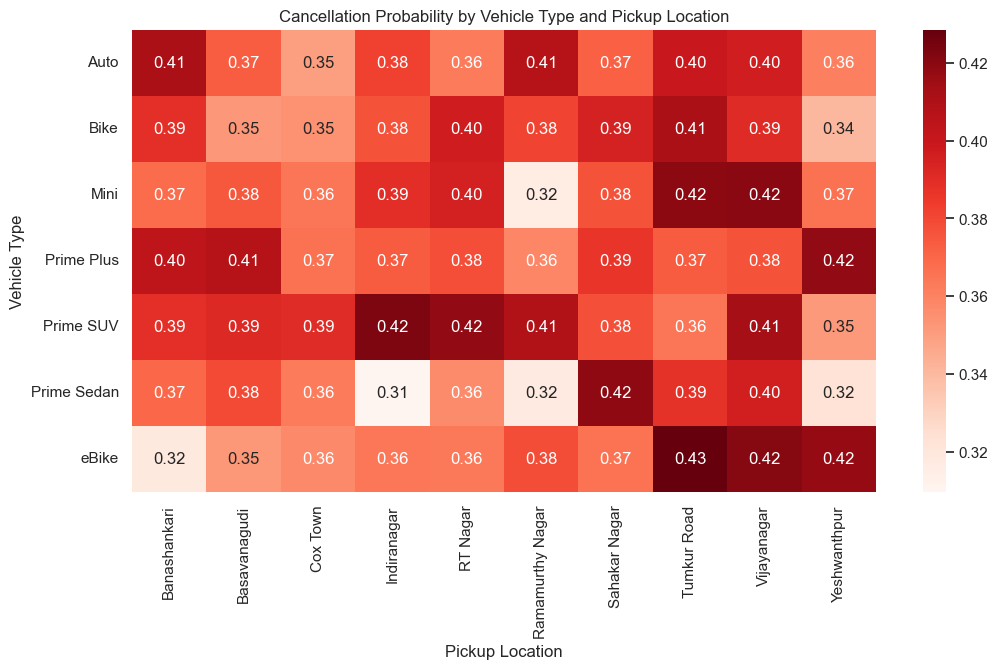

In [37]:
top_pickups = df['Pickup_Location'].value_counts().head(10).index
df_top = df[df['Pickup_Location'].isin(top_pickups)]
cancel_prob = pd.crosstab(
    df_top['Vehicle_Type'],
    df_top['Pickup_Location'],
    values=(df_top['Booking_Status'] != 'Success'),
    aggfunc='mean'
)
plt.figure(figsize=(12,6))
sns.heatmap(cancel_prob, cmap='Reds', annot=True, fmt=".2f")
plt.title('Cancellation Probability by Vehicle Type and Pickup Location')
plt.xlabel('Pickup Location')
plt.ylabel('Vehicle Type')
plt.show()

In [38]:
df.groupby('Vehicle_Type')['Booking_Value'].median().sort_values(ascending=False)


Vehicle_Type
Prime Sedan    391.0
Auto           389.0
Mini           386.0
eBike          386.0
Bike           384.0
Prime Plus     384.0
Prime SUV      382.0
Name: Booking_Value, dtype: float64

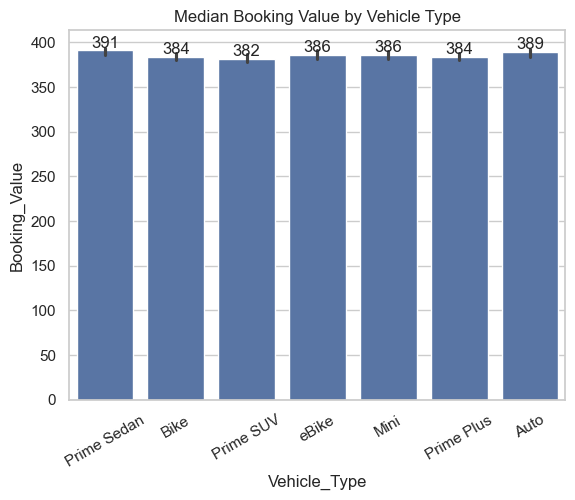

In [39]:
ax=sns.barplot(
    data=df,
    x='Vehicle_Type',
    y='Booking_Value',
    estimator='median'
)
ax.bar_label(ax.containers[0])
plt.title("Median Booking Value by Vehicle Type")
plt.xticks(rotation=30)
plt.show()


### Prediction Analysis
In this section we attempt to build a predictor for the booking status. For simplicity, we transform the categorical Booking_Status into a binary label. We then use a Logistic Regression classifier to predict whether a ride will be canceled or not, based on features such as booking value, ride distance, ratings, and time-related features.

We evaluate the performance of our model using accuracy score, confusion matrix, and ROC curve. In addition, a permutation importance plot is generated to gain insights into feature importances.

In [67]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [68]:
# Create a binary target for Booking_Status
df['Booking_Status_Binary'] = df['Booking_Status'].apply(lambda x: 1 if 'Cancel' in x or 'cancel' in x else 0)


In [74]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Time'].astype(str))


In [76]:
# Select features for the prediction
# We consider numeric features and a few derived time features
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Hour'] = df['Datetime'].dt.hour

In [77]:
# List of candidate numeric features
features = ['Booking_Value', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating', 'V_TAT', 'C_TAT', 'Day', 'Month', 'Hour']

In [78]:
# Some records might be missing in numeric features; fill with median values
X = df[features].fillna(df[features].median())
y = df['Booking_Status_Binary']

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [81]:
# Prediction and evaluation
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {acc:.2f}")

Prediction Accuracy: 0.90


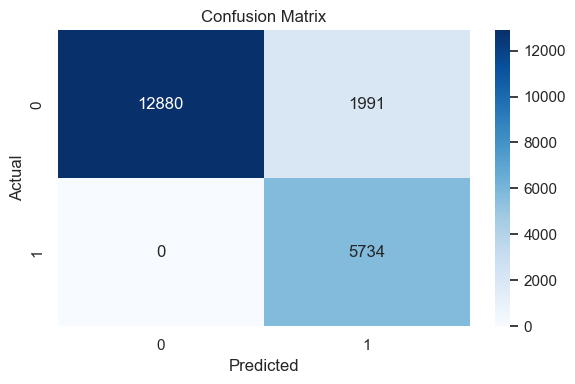

In [82]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

True Negative (12,880): Successful rides correctly predicted as not canceled

True Positive (1,991): Canceled rides correctly predicted as canceled

False Negative (5,734): Canceled rides wrongly predicted as successful

False Positive (0): Successful rides wrongly predicted as canceled

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy :", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall   :", round(recall, 2))
print("F1-score :", round(f1, 2))

Accuracy : 0.9
Precision: 0.74
Recall   : 1.0
F1-score : 0.85


## Summary
This project analyzes Ola and Uber ride booking data to identify factors affecting ride cancellations and revenue. The study finds that cancellations are mainly driven by operational and time-based factors such as driver response time, vehicle type, ride distance, and peak-hour demand rather than service ratings. Premium vehicles show higher reliability and booking value, while bike-based services experience more cancellations. A logistic regression model was developed to predict cancellations with strong performance, enabling early identification of high-risk bookings. The insights support improved operational efficiency, reduced cancellations, and better customer experience.

# Recommendation

* Improve driver availability monitoring during high-demand periods: This is crucial for aligning supply with demand, which helps reduce the number of unfulfilled requests during busy times.
* Reduce friction in the booking-to-pickup phase:Make it easier for customers to go from booking a ride to starting their trip. By making this process smoother, it can reduce frustration and fewer people will cancel or give up."
* Business Impact: Higher ride completion means more successful bookings are fulfilled, directly impacting revenue and operational efficiency.
Improved customer trust leads to  customer loyalty.

* Adjust driver supply planning by hour
* Offer time-based incentives during high-risk periods
* Communicate delays clearly during rush hours
* Business Impact: Smoother peak-hour operations